In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_parquet(os.path.join('data','jizdenky.parquet'))
df = df[df['odjezd'] >= '2024-11-08']
df = df[df['prostredek'] != 'autobus']
df = df[df['prestupy'] == 0]
df['spoj'] = df.apply(lambda row: f"""{row['prodejce']} {row['den']} {row['odjezd'].hour:02}:{row['odjezd'].minute:02}""", axis=1)

In [3]:
(df.groupby(["spoj","odkud","kam"])['cena'].max() / df.groupby(["spoj","odkud","kam"])['cena'].min()).dropna().nlargest(100)

C:\Users\micha\AppData\Local\Temp\ipykernel_3404\3376779085.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(["spoj","odkud","kam"])['cena'].max() / df.groupby(["spoj","odkud","kam"])['cena'].min()).dropna().nlargest(100)
C:\Users\micha\AppData\Local\Temp\ipykernel_3404\3376779085.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(["spoj","odkud","kam"])['cena'].max() / df.groupby(["spoj","odkud","kam"])['cena'].min()).dropna().nlargest(100)


spoj         odkud                      kam              
LE ne 10:58  Praha hl.n.                Ostrava hl.n.        7.767677
                                        Ostrava-Svinov       7.767677
LE pá 19:59  Pardubice hl.n.            Košice               6.150502
ČD ne 17:16  Berlin Hbf (tief)          Praha hl.n.          5.612403
ČD pá 06:28  Praha hl.n.                Berlin Hbf (tief)    5.612403
ČD pá 17:16  Berlin Hbf (tief)          Praha hl.n.          5.612403
ČD so 06:28  Praha hl.n.                Berlin Hbf (tief)    5.612403
ČD so 17:16  Berlin Hbf (tief)          Praha hl.n.          5.612403
ČD út 06:28  Praha hl.n.                Berlin Hbf (tief)    5.612403
LE čt 13:58  Praha hl.n.                Ostrava hl.n.        5.581006
LE čt 14:59  Pardubice hl.n.            Košice               5.516129
LE čt 13:58  Praha hl.n.                Ostrava-Svinov       5.413408
LE st 22:53  Košice                     Pardubice hl.n.      5.200627
LE so 14:59  Pardubice hl.n.    

In [7]:
(df.groupby(["odjezd","odkud","kam"])['cena'].max() / df.groupby(["odjezd","odkud","kam"])['cena'].min()).dropna().nlargest(100)

C:\Users\micha\AppData\Local\Temp\ipykernel_3404\2582829960.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(["odjezd","odkud","kam"])['cena'].max() / df.groupby(["odjezd","odkud","kam"])['cena'].min()).dropna().nlargest(100)


odjezd               odkud                      kam                
2024-11-12 06:28:00  Praha hl.n.                Berlin Hbf (tief)      5.612403
2024-11-20 22:53:00  Košice                     Pardubice hl.n.        5.200627
2024-11-21 03:56:00  Ostrava hl.n.              Praha hl.n.            5.020101
2024-11-21 04:03:00  Ostrava-Svinov             Praha hl.n.            5.020101
2024-11-10 06:28:00  Praha hl.n.                Berlin Hbf (tief)      3.932817
2024-11-11 06:28:00  Praha hl.n.                Berlin Hbf (tief)      3.932817
2024-11-12 17:16:00  Berlin Hbf (tief)          Praha hl.n.            3.932817
2024-11-19 06:28:00  Praha hl.n.                Berlin Hbf (tief)      3.932817
2024-11-30 13:19:00  Warszawa Centralna         Praha hl.n.            3.891837
2024-11-16 19:10:00  Wien Hbf                   Praha hl.n.            3.633075
2024-11-23 06:44:00  Praha hl.n.                Wien Hbf               3.633075
2024-11-13 06:28:00  Praha hl.n.                Berl

In [29]:
df.groupby(["odjezd","kam"])['oscrapovano'].nunique().nlargest(50)

C:\Users\micha\AppData\Local\Temp\ipykernel_3404\3677311969.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["odjezd","kam"])['oscrapovano'].nunique().nlargest(50)

KeyboardInterrupt



In [27]:
df[(df['odjezd'] == '2024-11-21 15:10:00')].groupby(['prodejce','odkud'])['kam'].nunique().nlargest(10)

C:\Users\micha\AppData\Local\Temp\ipykernel_3404\272647092.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[(df['odjezd'] == '2024-11-21 15:10:00')].groupby(['prodejce','odkud'])['kam'].nunique().nlargest(10)


prodejce  odkud                  
ČD        Ostrava hl.n.              2
          Berlin Hbf (tief)          1
          Brno hl.n.                 1
          Dresden Hbf                1
          Wien Hbf                   1
ARR       Amsterdam Bijlmer ArenA    0
          Amsterdam Centraal         0
          Amsterdam Zuid             0
          Bayerisch Eisenstein       0
          Berlin Baumschulenweg      0
Name: kam, dtype: int64

<Axes: xlabel='oscrapovano'>

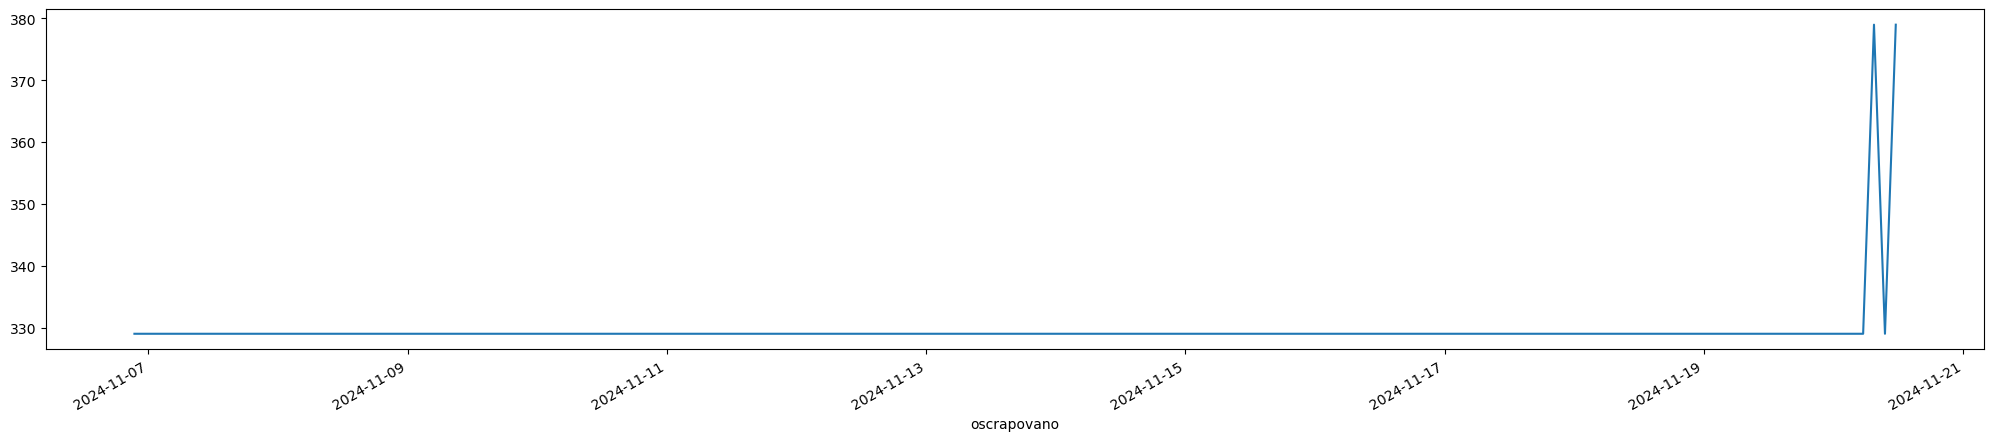

In [53]:
df[(df['odjezd'] == '2024-11-20 12:39:00') & (df['odkud'].str.contains('Brn')) & df['kam'].str.contains('Prah')].groupby('oscrapovano')['cena'].min().plot(figsize=(25,5))

<Axes: xlabel='oscrapovano'>

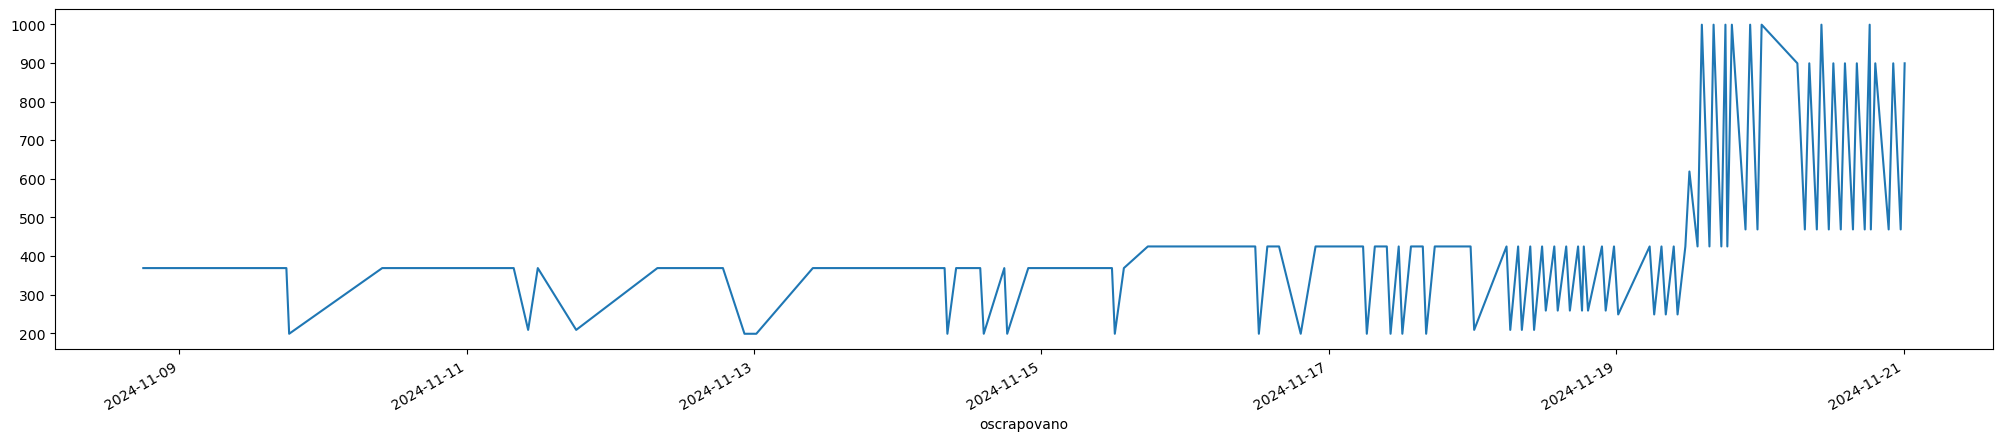

In [31]:
df[(df['odjezd'] == '2024-11-21 04:03:00')].groupby('oscrapovano')['cena'].min().plot(figsize=(25,5))